In [ ]:
import pandas as pd 
df = pd.read_csv('combined_vadodra.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       743 non-null    int64  
 1   id               743 non-null    int64  
 2   conversation_id  743 non-null    int64  
 3   created_at       743 non-null    float64
 4   date             743 non-null    object 
 5   timezone         743 non-null    int64  
 6   place            9 non-null      object 
 7   tweet            743 non-null    object 
 8   language         743 non-null    object 
 9   hashtags         743 non-null    object 
 10  cashtags         743 non-null    object 
 11  user_id          743 non-null    int64  
 12  user_id_str      743 non-null    int64  
 13  username         743 non-null    object 
 14  name             743 non-null    object 
 15  day              743 non-null    int64  
 16  hour             743 non-null    int64  
 17  link            

In [ ]:
df2 = df[['date','tweet','language','hashtags','nlikes','nreplies','nlikes','nretweets']]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       743 non-null    object
 1   tweet      743 non-null    object
 2   language   743 non-null    object
 3   hashtags   743 non-null    object
 4   nlikes     743 non-null    int64 
 5   nreplies   743 non-null    int64 
 6   nlikes     743 non-null    int64 
 7   nretweets  743 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 46.6+ KB


In [ ]:
df2['language'].describe()

count     743
unique     12
top        en
freq      646
Name: language, dtype: object

In [ ]:
df2= df2[df2.language == 'en']
'''for i in range(830):
  if(df1['language']!='en'):
    df1.drop(i,axis=0)'''

"for i in range(830):\n  if(df1['language']!='en'):\n    df1.drop(i,axis=0)"

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 742
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       646 non-null    object
 1   tweet      646 non-null    object
 2   language   646 non-null    object
 3   hashtags   646 non-null    object
 4   nlikes     646 non-null    int64 
 5   nreplies   646 non-null    int64 
 6   nlikes     646 non-null    int64 
 7   nretweets  646 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 45.4+ KB


In [ ]:
df1=df2

In [ ]:
df1['language'].describe()

count     646
unique      1
top        en
freq      646
Name: language, dtype: object

In [ ]:
#df1['tweet'][3]

In [ ]:
df1 = df1.drop_duplicates(subset=['tweet'])

In [ ]:
df1.info()
df1.reset_index(drop=True,inplace=True)
#df1.to_csv('k.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 742
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       577 non-null    object
 1   tweet      577 non-null    object
 2   language   577 non-null    object
 3   hashtags   577 non-null    object
 4   nlikes     577 non-null    int64 
 5   nreplies   577 non-null    int64 
 6   nlikes     577 non-null    int64 
 7   nretweets  577 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 40.6+ KB


In [ ]:
import re
#df1 = pd.read_csv('k (1).csv')
for i in range(577):
  df1['tweet'][i] = re.sub("@\S+", " ", df1['tweet'][i])
  df1['tweet'][i] = re.sub("#\S+", " ", df1['tweet'][i])
  df1['tweet'][i] = re.sub(r'https*\S+', ' ', df1['tweet'][i])
  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1['t'] = df1['tweet'].str.split().str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1= df1[df1.t > 3 ]

In [ ]:
df1.info()
df1.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 576
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       576 non-null    object
 1   tweet      576 non-null    object
 2   language   576 non-null    object
 3   hashtags   576 non-null    object
 4   nlikes     576 non-null    int64 
 5   nreplies   576 non-null    int64 
 6   nlikes     576 non-null    int64 
 7   nretweets  576 non-null    int64 
 8   t          576 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 45.0+ KB


In [ ]:
import pandas as pd 
#df1 = pd.read_csv('sl.csv')
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string

In [ ]:
df1.info()
#df1 = df1.sort_values(by="date")
df1.date.head(500)
#df1.to_csv('ll.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       576 non-null    object
 1   tweet      576 non-null    object
 2   language   576 non-null    object
 3   hashtags   576 non-null    object
 4   nlikes     576 non-null    int64 
 5   nreplies   576 non-null    int64 
 6   nlikes     576 non-null    int64 
 7   nretweets  576 non-null    int64 
 8   t          576 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 40.6+ KB


0      2021-03-13 11:35:37
1      2021-03-13 01:02:29
2      2021-03-12 14:34:27
3      2021-03-12 11:36:14
4      2021-03-12 09:01:34
              ...         
495    2021-03-05 14:36:23
496    2021-03-05 14:29:16
497    2021-03-05 14:24:40
498    2021-03-05 14:13:54
499    2021-03-05 13:40:53
Name: date, Length: 500, dtype: object

In [ ]:
df1['date'] = df1['date'].map(lambda x: x[0:10])


In [ ]:
df1.head()
df1.info()
df1.date.describe()
num=0
#df1 = df1 [df1,['category']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       576 non-null    object
 1   tweet      576 non-null    object
 2   language   576 non-null    object
 3   hashtags   576 non-null    object
 4   nlikes     576 non-null    int64 
 5   nreplies   576 non-null    int64 
 6   nlikes     576 non-null    int64 
 7   nretweets  576 non-null    int64 
 8   t          576 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 40.6+ KB


In [ ]:
len(df1)
df1['tweet'][531]
category = []
df1

,date,tweet,language,hashtags,nlikes,nreplies,nlikes,nretweets,t
0,2021-03-13,When a daughter encourages her mother who want...,en,[],15,1,15,0,25
1,2021-03-13,"Dereliction of duty, How much time dose Bmc ne...",en,[],1,0,1,0,34
2,2021-03-12,I chose to be protected by 50% than no protect...,en,"['vaccinated', 'inspire_lives']",1,0,1,0,32
3,2021-03-12,Modi's mother takes first dose of Covid vaccin...,en,[],0,0,0,0,19
4,2021-03-12,@CovidIndiaSeva Is this TRUE that Covishield s...,en,[],0,1,0,0,45
...,...,...,...,...,...,...,...,...,...
571,2021-03-09,#COVID19 Testing Updates https://t.co/OG0hWbCnb4,en,['covid19'],0,0,0,0,4
572,2021-03-08,@flipkartsupport I will do consumer complain a...,en,[],0,0,0,0,22
573,2021-03-06,@DefiStone Very passionate about alfa testing....,en,[],0,0,0,0,11
574,2021-03-05,@Twitter testing out a @joinClubhouse like fea...,en,['clubhouse'],0,0,0,0,13


In [ ]:
print(len(df1['date'][0]))

10


In [ ]:
for i in range(576):
  if(df1['date'][i]=='2021-03-05'):
    category.append(1)
  if(df1['date'][i]=='2021-03-06'):
    category.append(2)
  if(df1['date'][i]=='2021-03-07'):
    category.append(3)
  if(df1['date'][i]=='2021-03-08'):
    category.append(4)
  if(df1['date'][i]=='2021-03-09'):
    category.append(5)
  if(df1['date'][i]=='2021-03-10'):
    category.append(6)
  if(df1['date'][i]=='2021-03-11'):
    category.append(7)
  if(df1['date'][i]=='2021-03-12'):
    category.append(8)
  if(df1['date'][i]=='2021-03-13'):
    category.append(9)
  if(df1['date'][i]=='2021-03-14'):
    category.append(10)

In [ ]:
df1['category']=category

In [ ]:
for i in range(532):
  if(df1['date'][i]=='2021-03-05'):
    df1['category'][i]=1
  if(df1['date'][i]=='2021-03-06'):
    df1['category'][i]=2
  if(df1['date'][i]=='2021-03-07'):
    df1['category'][i]=3
  if(df1['date'][i]=='2021-03-08'):
    df1['category'][i]=4
  if(df1['date'][i]=='2021-03-09'):
    df1['category'][i]=5
  if(df1['date'][i]=='2021-03-10'):
    df1['category'][i]=6
  if(df1['date'][i]=='2021-03-11'):
    df1['category'][i]=7
  if(df1['date'][i]=='2021-03-12'):
    df1['category'][i]=8
  if(df1['date'][i]=='2021-03-13'):
    df1['category'][i]=9
  if(df1['date'][i]=='2021-03-14'):
    df1['category'][i]=10

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df1.head()

,date,tweet,language,hashtags,nlikes,nreplies,nlikes,nretweets,t,category
0,2021-03-13,When a daughter encourages her mother who want...,en,[],15,1,15,0,25,9
1,2021-03-13,"Dereliction of duty, How much time dose Bmc ne...",en,[],1,0,1,0,34,9
2,2021-03-12,I chose to be protected by 50% than no protect...,en,"['vaccinated', 'inspire_lives']",1,0,1,0,32,8
3,2021-03-12,Modi's mother takes first dose of Covid vaccin...,en,[],0,0,0,0,19,8
4,2021-03-12,@CovidIndiaSeva Is this TRUE that Covishield s...,en,[],0,1,0,0,45,8


In [ ]:
df1.to_csv('vadodra.csv')

In [ ]:
str=df1['date'][0]
a=str[0]
b=str[1]
c=str[4]
d=str[5]
print(a)
print(b)

2
0


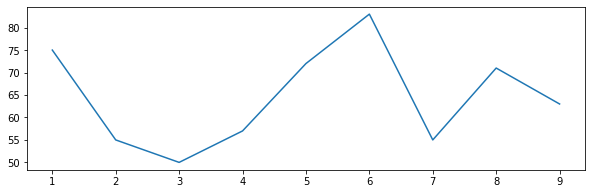

In [ ]:
#df1 = df1.sort_values(by="category")
import numpy as np
import matplotlib.pyplot as plt
date = df1.category
#date = np.array(category,dtype='str') 
x ,y  = np.unique(date, return_counts=True)
plt.figure(figsize=(10,3))
plt.plot(x,y)

In [ ]:
df1.head()

,date,tweet,language,hashtags,nlikes,nreplies,nlikes,nretweets,t,category
0,2021-03-13,Got 1st dose of the vaccine on 11 Mar at #Cov...,en,"['covishield', 'drharshavardhan', 'ministryofh...",2,0,2,0,34,9
1,2021-03-13,Today I and my family took the first dose of C...,en,"['covishield', 'covidvaccination', 'vaccinated...",9,1,9,3,34,9
2,2021-03-13,I got my first dose #CovidVaccine https://t.c...,en,['covidvaccine'],5,0,5,0,7,9
3,2021-03-13,First dose of Covishield vaccine inoculated to...,en,"['covid19', 'vaccine']",15,1,15,0,16,9
4,2021-03-13,"As I had already come that far , had no choice...",en,[],0,0,0,0,58,9


In [ ]:
def tokenize(text):
    tokens = re.split("\W+", text)
    return tokens
df1['tweet']= df1['tweet'].apply (lambda x: tokenize(x.lower()))

In [ ]:
df1.head()

,date,tweet,language,hashtags,nlikes,nreplies,nlikes,nretweets,t,category
0,2021-03-13,"[got, 1st, dose, of, the, vaccine, on, 11, mar...",en,"['covishield', 'drharshavardhan', 'ministryofh...",2,0,2,0,34,9
1,2021-03-13,"[today, i, and, my, family, took, the, first, ...",en,"['covishield', 'covidvaccination', 'vaccinated...",9,1,9,3,34,9
2,2021-03-13,"[i, got, my, first, dose, covidvaccine, https,...",en,['covidvaccine'],5,0,5,0,7,9
3,2021-03-13,"[first, dose, of, covishield, vaccine, inocula...",en,"['covid19', 'vaccine']",15,1,15,0,16,9
4,2021-03-13,"[as, i, had, already, come, that, far, had, no...",en,[],0,0,0,0,58,9


In [ ]:
nltk.download("stopwords")
stopwords = stopwords.words('english')
def remove_stopword(text):
    text_nostopword= [char for char in text if char not in stopwords]
    return text_nostopword

df1['tweet']= df1['tweet'].apply(lambda x: remove_stopword(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1.to_csv('patna_clean.csv')

In [ ]:
data= pd.DataFrame(df1[["tweet","category"]])
#data_list = df1.loc[:,"tweet"].to_list()
#print(len(data_list))
#data_list
data_l = []
sum = []
for j in range(1,11):
  for i in range(580):
    if(df1.category[i] == j):
      data_l.append(df1.tweet[i])
      flat_data_list = [item for sublist in data_l for item in sublist]
      len(flat_data_list)
      data_count= pd.DataFrame(flat_data_list)
      data_count= data_count[0].value_counts()
  sum.append(data_count.vaccination + data_count.covid + data_count.testing)
  data_l = []

In [ ]:
# putting the twitter in flat list
flat_data_list = [item for sublist in data_l for item in sublist]
len(flat_data_list)
sum

[67, 57, 50, 62, 65, 71, 40, 67]

In [ ]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()
trial_list = []
trial_list.append(data_count['vaccination'])
trial_list.append(data_count['covid'])
trial_list.append(data_count['testing'])
trial_list

KeyError: ignored

In [ ]:
from nltk.probability import FreqDist
freq_count= FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count


FreqDist({1: 1301,
          2: 328,
          3: 122,
          4: 62,
          5: 42,
          6: 25,
          7: 23,
          8: 18,
          9: 7,
          10: 5,
          11: 2,
          12: 7,
          13: 2,
          14: 7,
          15: 3,
          16: 3,
          17: 1,
          18: 1,
          22: 2,
          23: 1,
          24: 1,
          27: 1,
          28: 1,
          31: 1,
          34: 1,
          37: 1,
          44: 1,
          49: 1,
          66: 1,
          85: 1,
          91: 1,
          149: 1,
          378: 1})

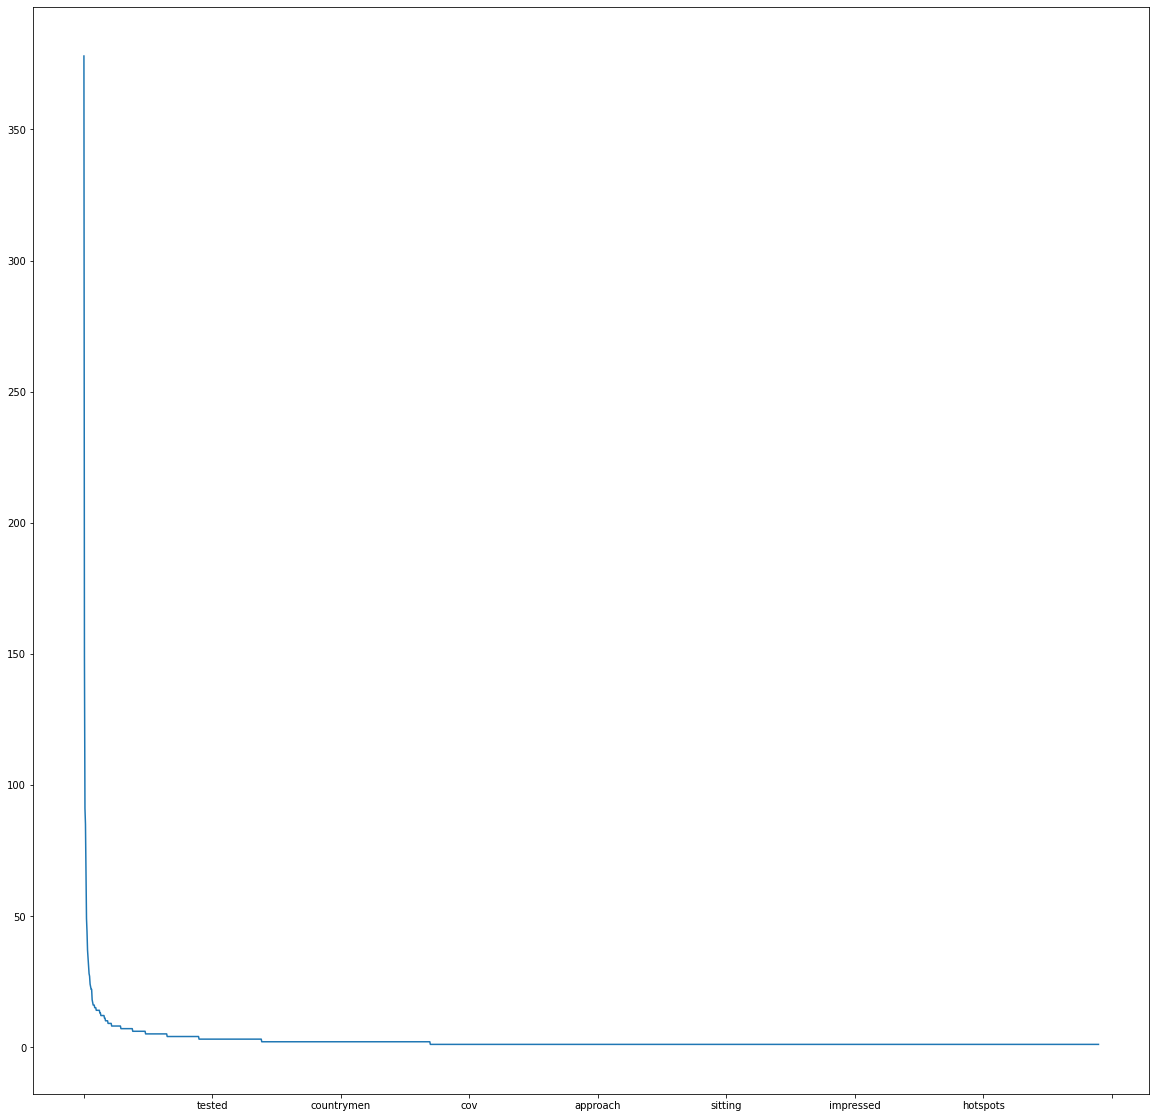

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
data_count.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


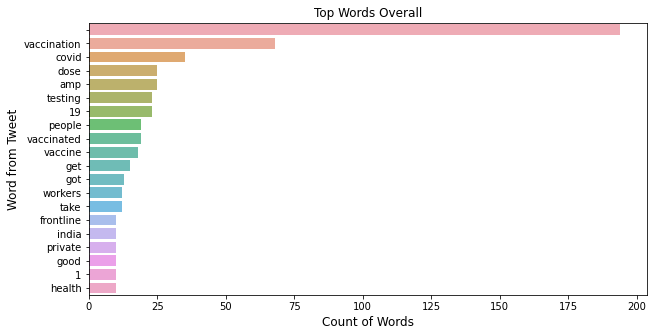

In [ ]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [ ]:
sum

[122, 126, 119, 93, 493, 342, 222, 243]

In [ ]:
df3 = pd.DataFrame(columns = ["frequency","index"])

In [ ]:
df3

,frequency,index


In [ ]:
df3['frequency'] = sum

In [ ]:
df3

,frequency,index
0,122,NaN
1,126,NaN
2,119,NaN
3,93,NaN
4,493,NaN
5,342,NaN
6,222,NaN
7,243,NaN


In [ ]:
dates = [ '25/02/2021','26/02/2021','27/02/2021','28/02/2021','01/03/2021','02/03/2021','03/03/2021','04/03/2021']

In [ ]:
df3['index'] = dates

In [ ]:
df3

,frequency,index
0,122,25/02/2021
1,126,26/02/2021
2,119,27/02/2021
3,93,28/02/2021
4,493,01/03/2021
5,342,02/03/2021
6,222,03/03/2021
7,243,04/03/2021


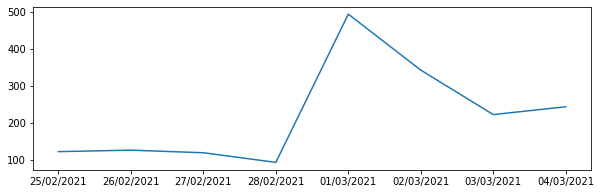

In [ ]:
x ,y  = dates,sum
plt.figure(figsize=(10,3))
plt.plot(x,y)

In [ ]:
import seaborn as sns

In [ ]:
data = (dates,sum)